# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ***Load Data***

## ***Duración de las mareas***

In [2]:
path = 'outputs/'

file = 'duracion_marea_df.csv'

df = pd.read_csv(path + file)

mask = df['Ind Propiedad'] == 'Propia'
df = df[mask]
df.head()

planta fecha_produccion  id_embarcacion  zona_de_pesca_id  volumen  \
0  CHIMBOTE       2018-04-07           17361                 3  202.720   
1   SAMANCO       2018-04-07           10614                 3  161.505   
2  CHIMBOTE       2018-04-07            6239                 3  153.825   
3      SUPE       2018-04-07           20777                 5  451.985   
6    CALLAO       2018-04-07           12974                 5  265.635   

  Ind Propiedad  duration_marea  periodo temporada  
0        Propia       19.633333     2018    2018-I  
1        Propia       23.523611     2018    2018-I  
2        Propia       20.000000     2018    2018-I  
3        Propia       12.166667     2018    2018-I  
6        Propia       15.050000     2018    2018-I

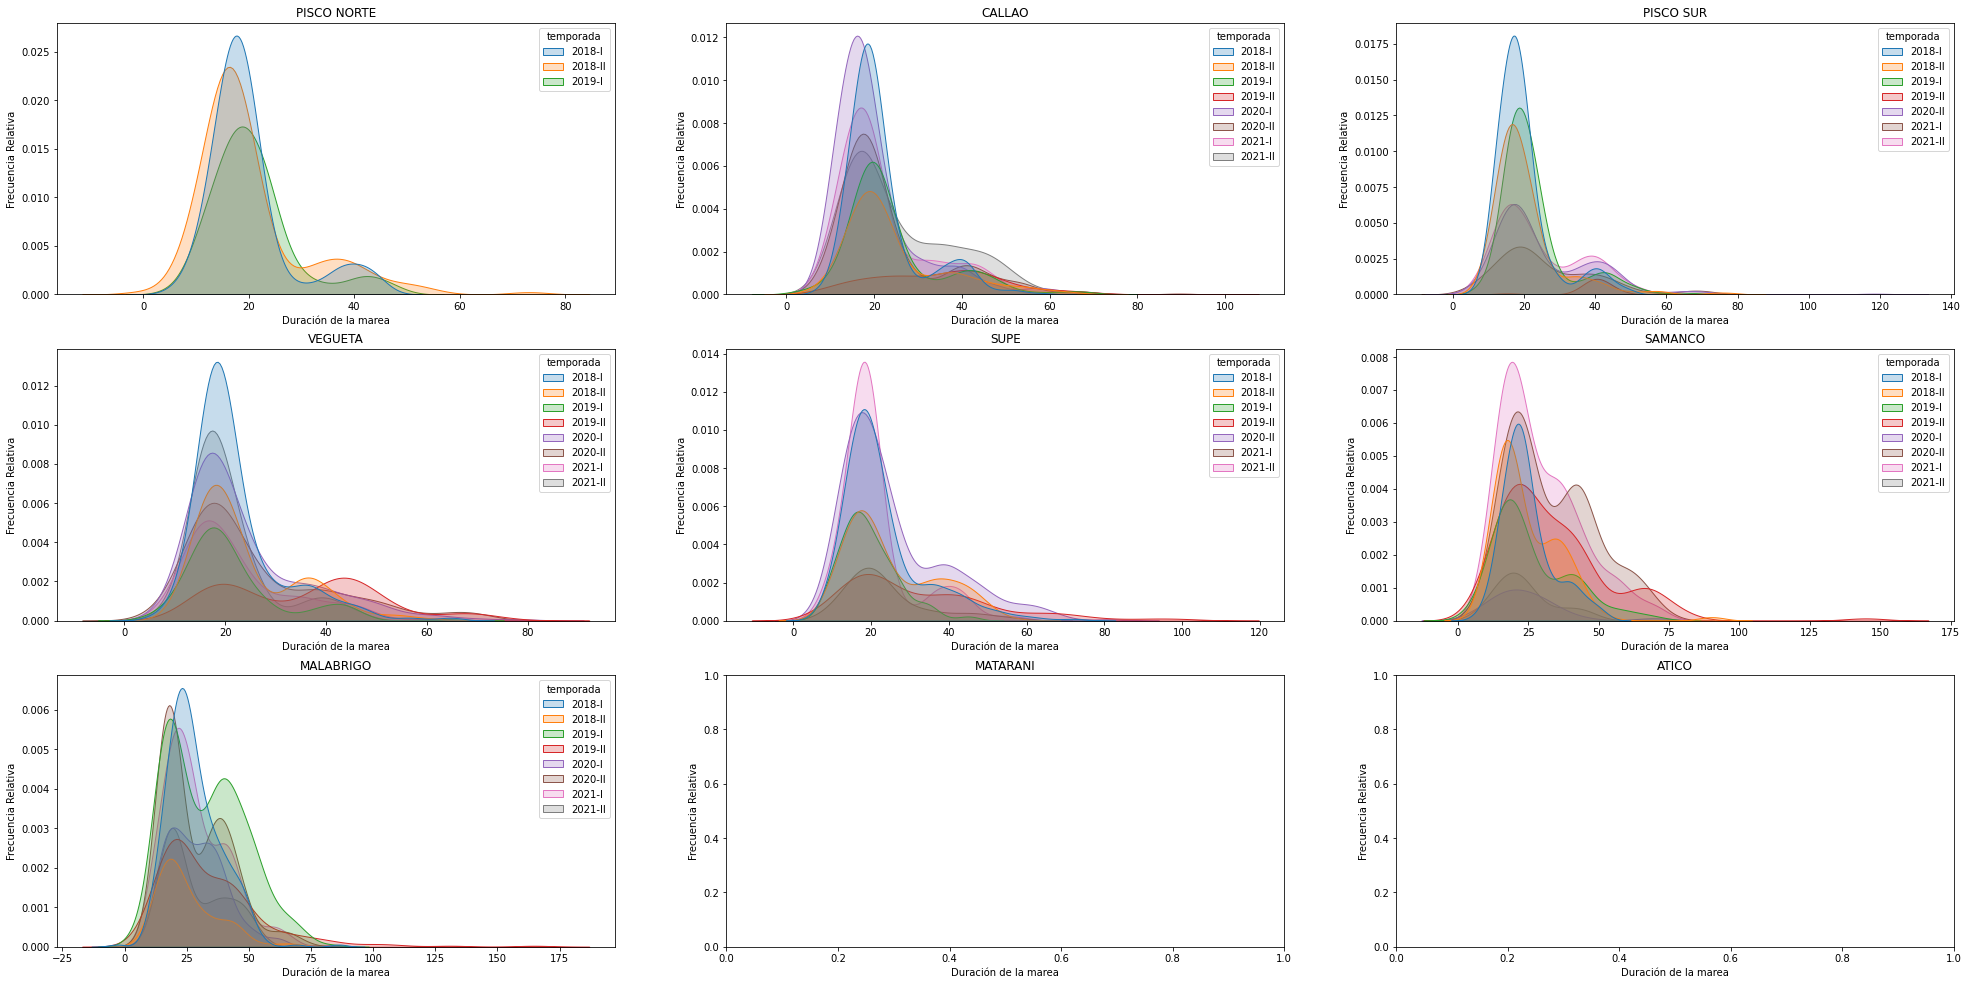

In [20]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(3, 3, figsize=(34, 17))
# formatter = FuncFormatter(ut.thousands)
data2 = df.copy()
values = ['PISCO NORTE', 'CALLAO', 'PISCO SUR', 'VEGUETA', 'SUPE', 'SAMANCO', 'MALABRIGO', 'MATARANI', 'ATICO']

for i in range(3):
    for j in range(3):
        k =3*i + j
        # sns.histplot(ax=ax[i, j], data=data2[(data2['Descrip Planta'] == values[k])&(data2['dif_minutes'] < 128)], x="dif_minutes", kde=False, hue="Ind Propiedad", bins=60)
        sns.kdeplot(ax=ax[i, j], data=data2[(data2['planta'] == values[k])], x="duration_marea", hue="temporada", fill=True)
        ax[i, j].set_title(values[k])
        ax[i, j].set_ylabel('Frecuencia Relativa')
        ax[i, j].set_xlabel('Duración de la marea')

# plt.savefig('montos.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
df['duration_marea'].describe(percentiles=np.arange(0, 1, 0.03))

count    12811.000000
mean        25.567041
std         13.148770
min         -5.000000
0%          -5.000000
3%          10.666667
6%          12.300000
9%          13.300000
12%         14.133333
15%         14.816667
18%         15.416667
21%         15.933333
24%         16.483333
27%         16.916667
30%         17.366667
33.0%       17.816667
36%         18.266667
39%         18.750000
42%         19.236667
45.0%       19.750000
48%         20.283333
50%         20.716667
51%         20.916667
54%         21.583333
57.0%       22.283333
60%         23.216667
63%         24.333333
66.0%       25.700000
69%         27.600000
72%         30.533333
75%         33.508333
78%         35.866667
81%         37.766667
84%         39.866667
87%         41.883333
90.0%       44.033333
93%         47.271667
96%         53.116667
99%         67.480000
max        164.883333
Name: duration_marea, dtype: float64

## ***Barcos de TASA***

In [14]:
path = 'datasets/'

file = 'df_embar.xlsx'
df_embar = pd.read_excel(path + file, converters={'Matricula':str})
df_embar.loc[:, 'Matricula'] = (
            df_embar['Matricula']
            .str.split(r"-", n=-1, expand=True)
            .loc[:, 1]
            .to_numpy()
        )
df_embar.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo  \
0            ILO       2018-04-01     29556              9   2018-04-01   
1            ILO       2018-04-01     21106              9   2018-04-01   
2            ILO       2018-04-04     13954              9   2018-04-04   
3            ILO       2018-04-04     41816              9   2018-04-04   
4            ILO       2018-04-04     11074              9   2018-04-04   

  Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  
0    16:50:58  2018-04-01   00:10:00    106.240       Tercera  
1    18:40:44  2018-04-01   01:00:00     87.295       Tercera  
2    19:33:45  2018-04-04   06:10:00     30.665       Tercera  
3    19:33:26  2018-04-04   06:10:00     51.350       Tercera  
4    19:34:02  2018-04-04   06:10:00     10.125       Tercera

In [15]:
mask = df_embar['Ind Propiedad'] == 'Tercera'
df_embar.loc[~mask, 'Matricula'].nunique()

48

## ***Barcos con frío***

In [16]:
file = 'df_prio_embar.xlsx'
df_prio_embar = pd.read_excel(path + file, converters={'Matricula':str})
df_prio_embar.head()

Orden           Embarc Matricula         Tipo    CBOD
0      1        SAN JUDAS      0254  3 Exclusivo  389.83
1      2          COQUI X     28225  3 Exclusivo  388.94
2      3        COQUI XII     11074  3 Exclusivo  353.77
3      4  CARMEN JUDITH 1     10437  3 Exclusivo  349.71
4      5     SAN JUDAS II     41816  3 Exclusivo  339.00

In [19]:
mask = df_embar['Ind Propiedad'] == 'Tercera'
df = pd.merge(df_embar[~mask], df_prio_embar, on='Matricula', how='left')
df.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo  \
0       CHIMBOTE       2018-04-07     17361              3   2018-04-07   
1       CHIMBOTE       2018-04-07      6239              3   2018-04-07   
2        SAMANCO       2018-04-07     18294              3   2018-04-07   
3           SUPE       2018-04-07     20777              5   2018-04-07   
4         CALLAO       2018-04-07     12974              5   2018-04-07   

  Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden  \
0    20:30:00  2018-04-07   00:52:00    202.720        Propia      8   
1    21:32:00  2018-04-07   01:32:00    153.825        Propia      8   
2    20:40:00  2018-04-07   01:03:00    341.720        Propia     13   
3    18:40:00  2018-04-07   06:30:00    451.985        Propia      3   
4    18:51:00  2018-04-07   03:48:00    265.635        Propia     18   

     Embarc             Tipo     CBOD  
0   TASA 59  Propio con Frio  570.004  
1  TASA 424  Propio sin Frio  412.910  
2   TASA 42  Propio con Frio  485.400  
3   TASA 52  Propio con Frio  604.539  
4  TASA 419  Propio con Frio  407.990

In [25]:
mask1 = df['Tipo'] == 'Propio con Frio'
df.loc[mask1, 'Matricula'].nunique()

19